In [1]:
import os
for dirname, _, filenames in os.walk("C:\\Users\\benke\\OneDrive\\Documents\\Year 2 Uni\\Comp2003\\Data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115822_524.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115830_439.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115834_690.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115846_581.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115853_178.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115905_027.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115910_470.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115926_076.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115929_455.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\Data\Healthy\IMG_20210921_115935_268.jpg
C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import MaxPooling2D
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# Define image constrains (width and height, dataset batch size  and channels )
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
# LOAD DATASET 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\benke\\OneDrive\\Documents\\Year 2 Uni\\Comp2003\\comp2003-2023-7\\Data",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1069 files belonging to 2 classes.


In [6]:
len(dataset)

34

In [7]:
# Dataset folders
class_names = dataset.class_names
print(class_names)

['Healthy', 'Virus']


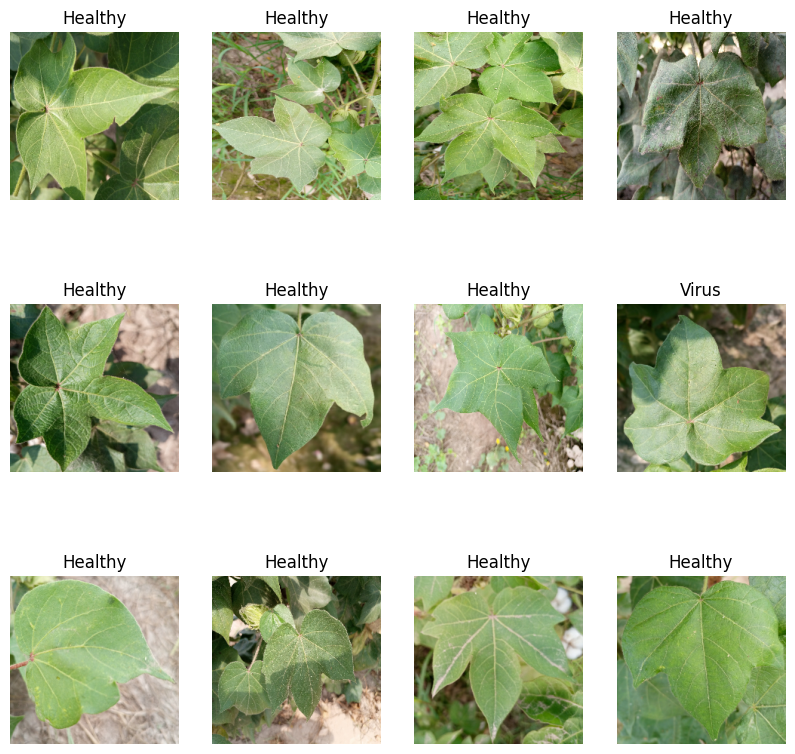

In [8]:
# PLot images from the dataset
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
def split_dataset(ds, train_sp=0.7, val_sp=0.2, test_sp=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
         
    train_size = int(train_sp * ds_size)
    val_size = int(val_sp * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [10]:
# Assing split values to respective spilts
train_ds, val_ds, test_ds = split_dataset(dataset)

In [11]:
len(train_ds)

23

In [12]:
len(val_ds)

6

In [13]:
len( test_ds)

5

In [14]:
from tensorflow.keras import layers
# Define a model layer to be used by the CNN model to resize the images input into 224 * 224 and rescale them to values between 0 and 1
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [15]:
# Define a model layer for flipping and rotating images to create more training data and help improve the learning process
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
    
])

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\benke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,394 (669.51 KB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,
         epochs=45,
         validation_data=val_ds,
         batch_size=BATCH_SIZE,
         verbose=1)
# steps_per_epoch=len(training_set)
# validation_steps=len(test_set)

Epoch 1/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8716 - loss: 0.4705 - val_accuracy: 0.9010 - val_loss: 0.3346
Epoch 2/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8826 - loss: 0.3756 - val_accuracy: 0.8728 - val_loss: 0.3907
Epoch 3/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8811 - loss: 0.3724 - val_accuracy: 0.9010 - val_loss: 0.3343
Epoch 4/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8972 - loss: 0.3431 - val_accuracy: 0.8439 - val_loss: 0.4754
Epoch 5/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.8692 - loss: 0.4315 - val_accuracy: 0.8542 - val_loss: 0.4299
Epoch 6/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.8785 - loss: 0.3804 - val_accuracy: 0.8854 - val_loss: 0.3818
Epoch 7/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8895 - loss: 0.3600 - val_accuracy: 0.8958 - val_loss: 0.3312
Epoch 8/45
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8746 - loss: 0.3834 - val_accuracy: 0.9191 - val_loss:

In [21]:
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.8834 - loss: 0.3641


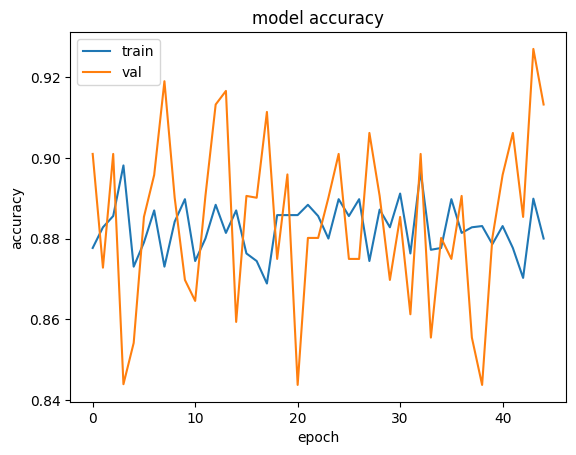

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

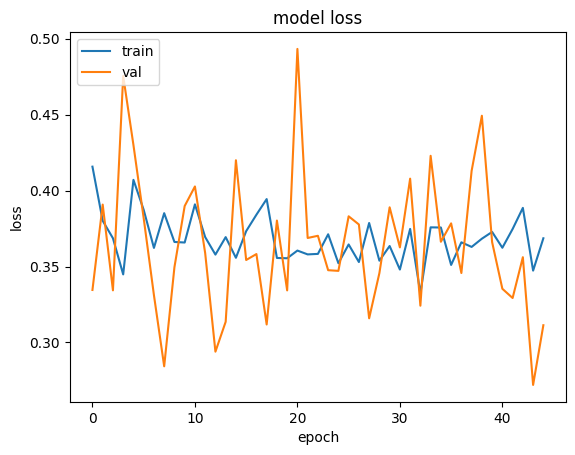

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
test_dir = 'C:\\Users\\benke\\OneDrive\\Documents\\Year 2 Uni\\Comp2003\\comp2003-2023-7\\Data'

In [25]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    label_mode=None,

)

Found 1069 files.


In [26]:
len(test_dataset)

34

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


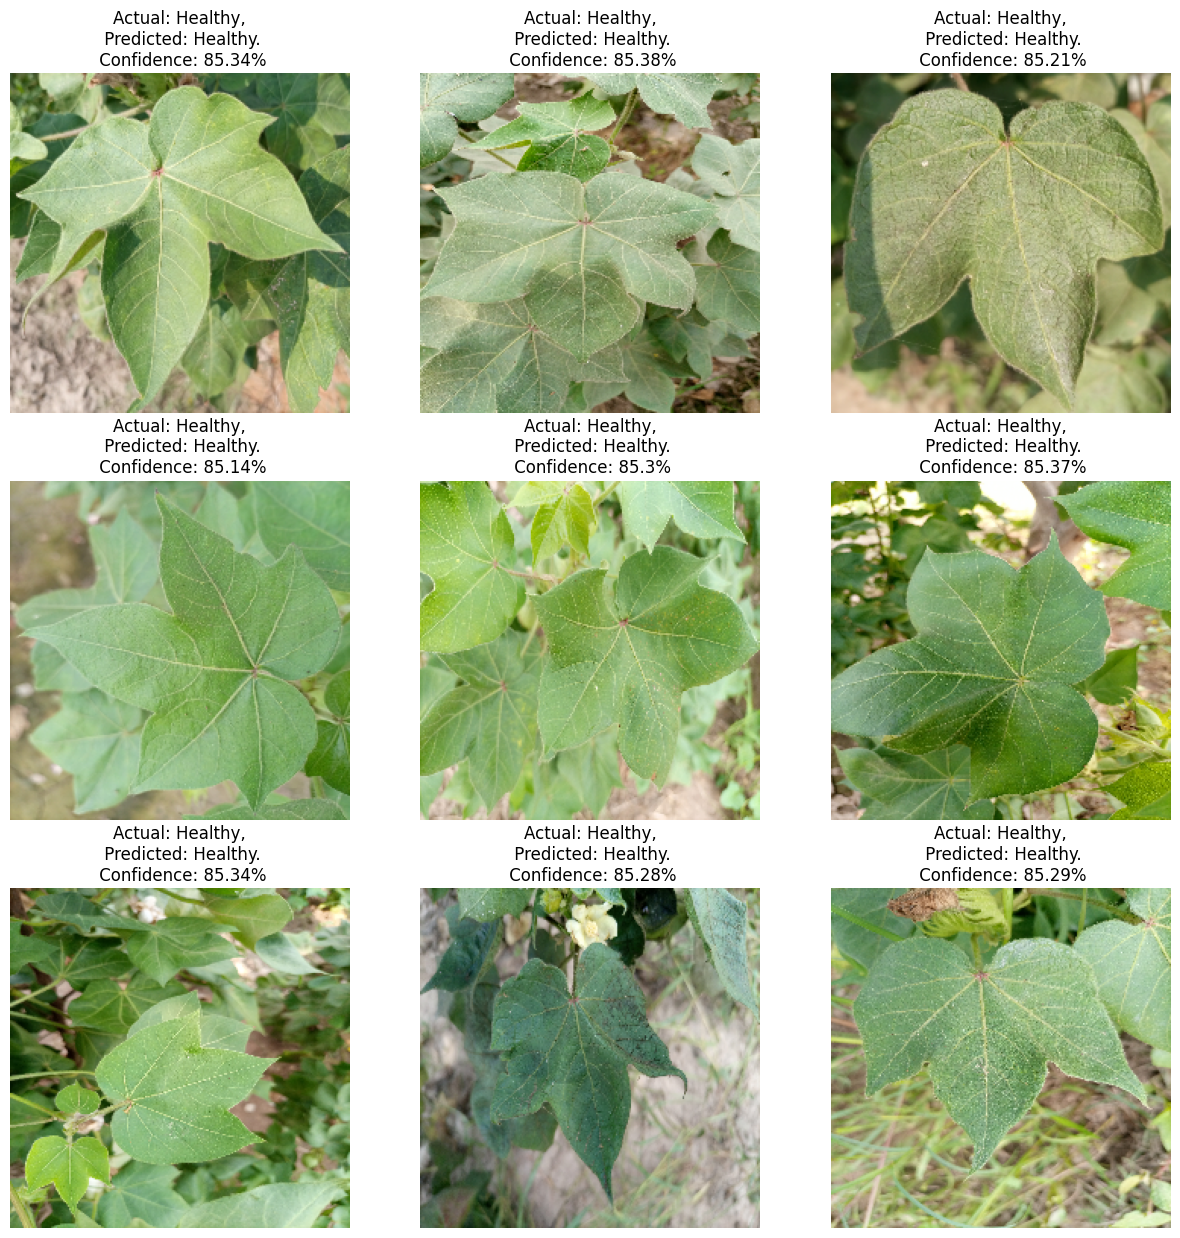

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
pred_probs = model.predict(test_ds) 

5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step


In [36]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_true = []

for batch in test_ds:
    y_true.extend(batch[1].numpy()) 

y_true = np.array(y_true)

In [37]:
y_true

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0])

In [38]:
y_pred = np.argmax(pred_probs, axis=1)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

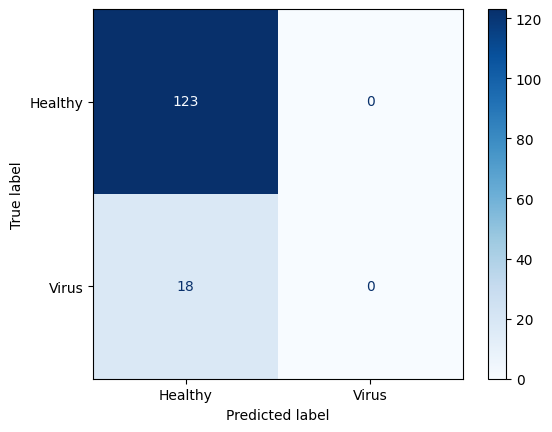

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [41]:
print(len(y_true), len(y_pred))


141 141


In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import cv2
# Loads the image
img_path = "C:\\Users\\benke\\OneDrive\\Documents\\Year 2 Uni\\Comp2003\\bad leaf.jpg"  # Path to the leaf image
img = cv2.imread(img_path)  # Load the image

if img is not None:  
    # Resize the image to 200x200
    img = cv2.resize(img, (200, 200))  
   
    # Convert the resized image to PIL format 
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Creates a PIL Image from the numpy array
    img_pil = Image.fromarray(rgb_img)

    # Resize the image to match model input size
    resized_img = img_pil.resize((IMAGE_SIZE, IMAGE_SIZE))

    # Convert the resized image to a numpy array and add a batch dimension
    img_array = image.img_to_array(resized_img)  
    
    img_array = tf.expand_dims(img_array, 0)  

    # Preprocess the image
    # Rescale the pixel values to [0, 1]
    normalized_img = img_array / 255.0  

    # Make predictions
    predictions = model.predict(normalized_img)  

    # Interpret predictions
    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(predictions[0])  
    # Map the index to the corresponding class name
    predicted_class = class_names[predicted_class_index]  

    # Print the predicted class
    print("Predicted class:", predicted_class)
else:
    print("Failed to load the image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class: Healthy


In [ ]:
model.save('my_model.keras')

In [ ]:
# Compile the model
#model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
from keras.models import load_model
model = tf.keras.models.load_model('my_model.keras', compile = False)

In [ ]:
import tensorflow as tf
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model("C:\\Users\\benke\\OneDrive\\Documents\\Year 2 Uni\\Comp2003\\TF Model\\my_model.keras") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

OSError: SavedModel file does not exist at: C:\Users\benke\OneDrive\Documents\Year 2 Uni\Comp2003\TF Model\{saved_model.pbtxt|saved_model.pb}

In [ ]:
tflite_model = converter.convert()
tflite_model_file_path = 'C:\\Users\\benke\\OneDrive\\Documents\\Year 2 Uni\\Comp2003\\TF Model'
with open(tflite_model_file_path, 'wb') as f:
    f.write(tflite_model)
print(f"TensorFlow Lite model saved to '{tflite_model_file_path}'")


AttributeError: 'Sequential' object has no attribute '_get_save_spec'

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1
